<a href="https://colab.research.google.com/github/vncecruz/Emptech-2/blob/main/FINALPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset and Describe Dataset

In [2]:
#IMPORT DATASET
import pandas as pd
loan = pd.read_csv('/content/drive/MyDrive/Emptech/Loan_Train.csv')
print(loan.shape)

(614, 13)


Link of the Dataset: https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set

# Data Information

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Importing Libaries

In [20]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt

# Fill out null values

In [4]:
#FILL OUT MISSING VALUES

#Categoral terms
loan['Gender'] = loan["Gender"].fillna(loan['Gender'].mode()[0])
loan['Gender'] = loan["Gender"].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan["Married"].fillna(loan['Married'].mode()[0])
loan['Dependents'] = loan["Dependents"].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed'] = loan["Self_Employed"].fillna(loan['Self_Employed'].mode()[0])

#numerical terms
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mean())

loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
loan['LoanAmount'].mean()

146.41216216216216

# Graphs about the dataset

Number of people who applies for a loan by gender: 
Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-11-dda0184b0092>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=loan, palette = 'Set1')


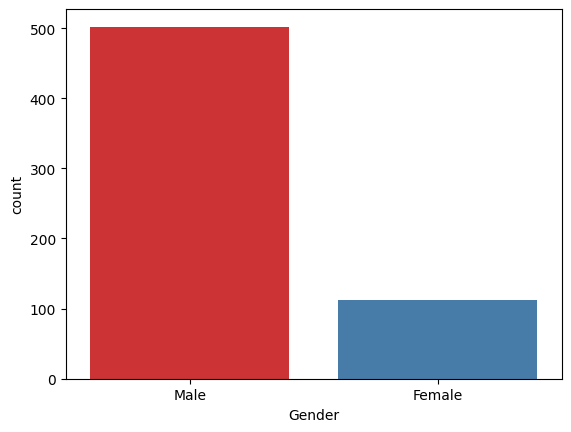

In [ ]:
print('Number of people who applies for a loan by gender: ')
print(loan['Gender'].value_counts())
sns.countplot(x='Gender',data=loan, palette = 'Set1')
plt.show()

Number of people who applies for a loan by dependents: 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-12-913ad6bef85e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=loan, palette = 'Set1')


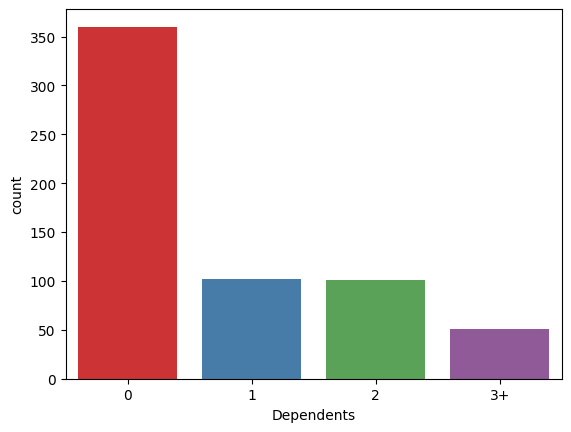

In [ ]:
print('Number of people who applies for a loan by dependents: ')
print(loan['Dependents'].value_counts())
sns.countplot(x='Dependents',data=loan, palette = 'Set1')
plt.show()

Number of people who applies for a loan by self employed: 
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-13-3ab5fe88e988>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed',data=loan, palette = 'Set1')


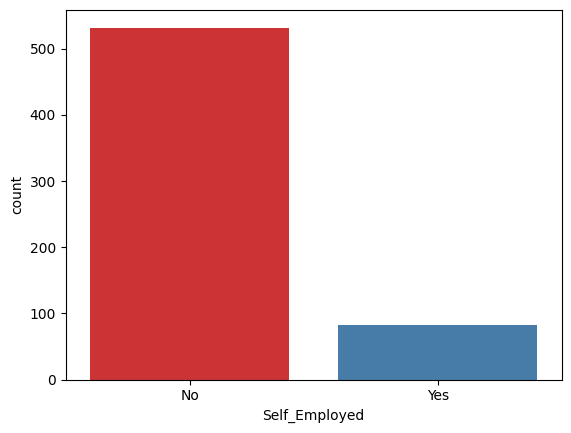

In [ ]:
print('Number of people who applies for a loan by self employed: ')
print(loan['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=loan, palette = 'Set1')
plt.show()

Number of people who applies for a loan by Loan Amount: 
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-14-42681dc1a655>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount',data=loan, palette = 'Set1')


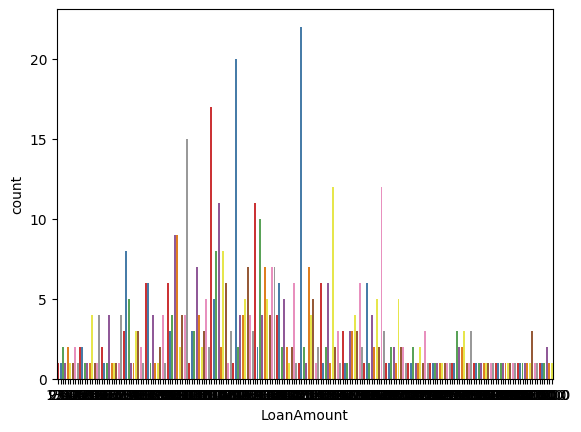

In [ ]:
print('Number of people who applies for a loan by Loan Amount: ')
print(loan['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=loan, palette = 'Set1')
plt.show()

In [ ]:
print("Class distribution:\n", loan['Loan_Status'].value_counts())

Class distribution:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


# Creating the model

In [6]:
loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
loan['ApplicantIncomeLog'] = np.log(loan['ApplicantIncome'] + 1)
loan['CoapplicantIncomeLog'] = np.log(loan['CoapplicantIncome'] + 1)
loan['LoanAmountLog'] = np.log(loan['LoanAmount'] + 1)
loan['Loan_Amount_Term_Log'] = np.log(loan['Loan_Amount_Term'] + 1)
loan['Total_Income_Log'] = np.log(loan['Total_Income'] + 1)

#Drop columns not important to the model
cols = ['Loan_ID','ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
loan = loan.drop(columns=cols, axis=1)

# Convert the categorical columns into numerical columns
cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    loan[col] = le.fit_transform(loan[col])

# Separate the features and the target variable
X = loan.drop(columns=['Loan_Status'], axis=1)
y = loan['Loan_Status']

In [41]:
#Split the data and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
#LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) * 100

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}%")

Logistic Regression Accuracy: 77.27%


In [43]:
#DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree) * 100

print(f"Decision Tree Classifier Accuracy: {accuracy_decision_tree:.2f}%")

Decision Tree Classifier Accuracy: 71.43%


In [44]:
#MLPCLassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100

print(f"MLP Classifier Accuracy: {accuracy_mlp:.2f}%")

MLP Classifier Accuracy: 74.68%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Calculate models

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

ROC_AUC_SCORE for Logistic Regression is  0.7024074074074075


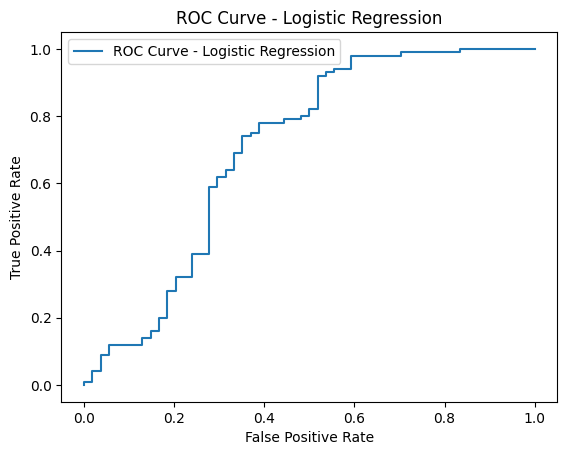

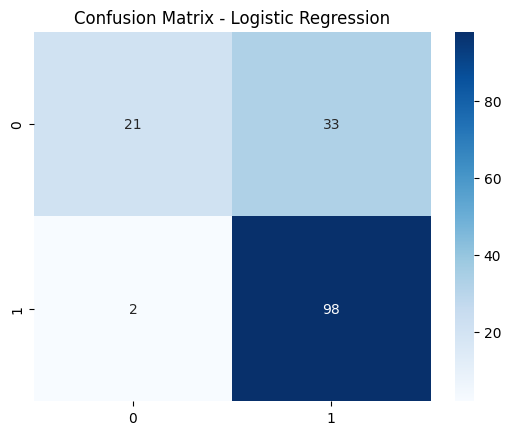

Classification Report: Decision Trees
              precision    recall  f1-score   support

           0       0.65      0.57      0.61        54
           1       0.78      0.83      0.81       100

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154

ROC_AUC_SCORE for Decision Trees is  0.7020370370370371


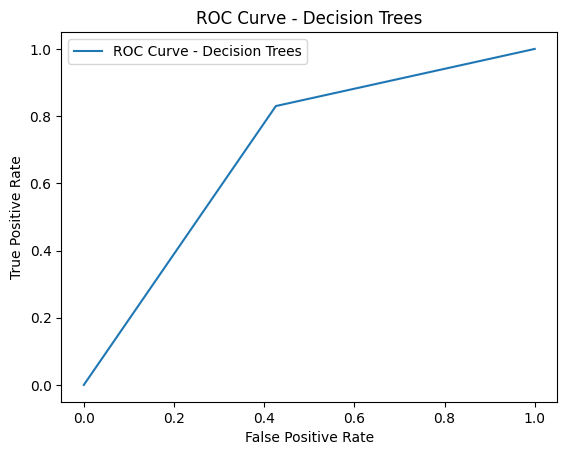

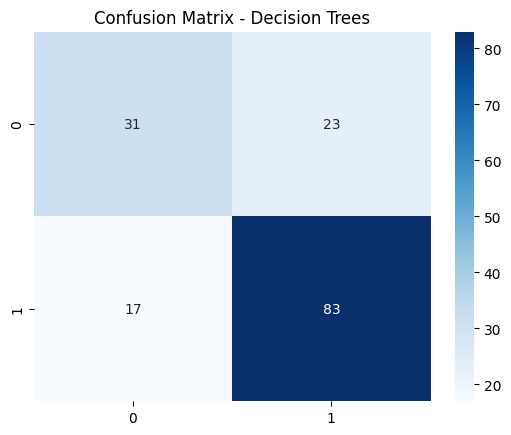

Classification Report: MLPClassifier
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

ROC_AUC_SCORE for MLPClassifier is  0.7637037037037037


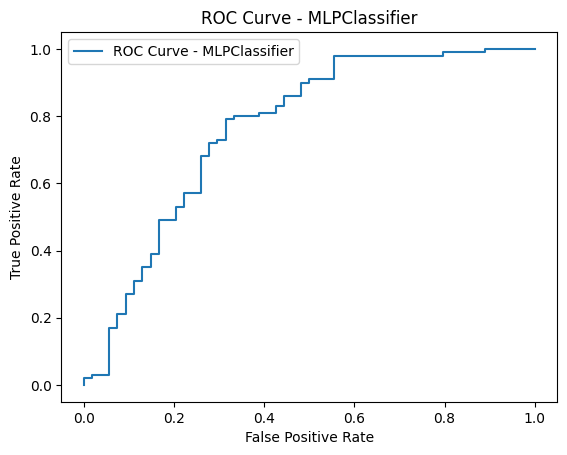

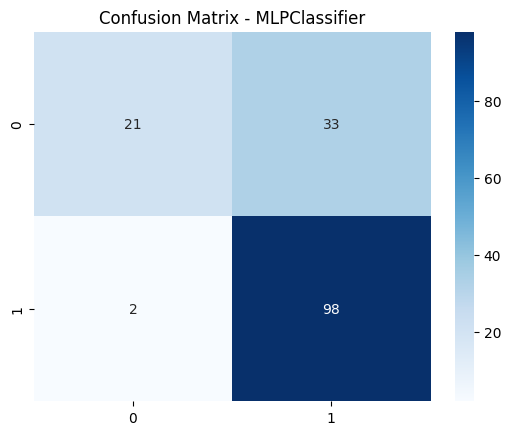

In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier()
}

accuracy, precision, recall = {}, {}, {}

# Evaluate each model
for key in models.keys():
    models[key].fit(X_train, y_train)
    predictions = models[key].predict(X_test)
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions)
    recall[key] = recall_score(y_test, predictions)
    Y_proba = models[key].predict_proba(X_test)[:, 1]

    print(f'Classification Report: {key}')
    print(classification_report(y_test, predictions))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_proba)
    print(f'ROC_AUC_SCORE for {key} is ', roc_auc_score(y_test, Y_proba))

    plt.plot(false_positive_rate, true_positive_rate, label=f'ROC Curve - {key}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {key}')
    plt.legend(loc='best')
    plt.show()

    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {key}')
    plt.show()

# EVALUATE METRICS

In [36]:
loan_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
loan_model['Accuracy'] = accuracy.values()
loan_model['Precision'] = precision.values()
loan_model['Recall'] = recall.values()

print(loan_model)

                     Accuracy  Precision  Recall
Logistic Regression  0.772727   0.748092    0.98
Decision Trees       0.720779   0.761468    0.83
MLPClassifier        0.772727   0.748092    0.98


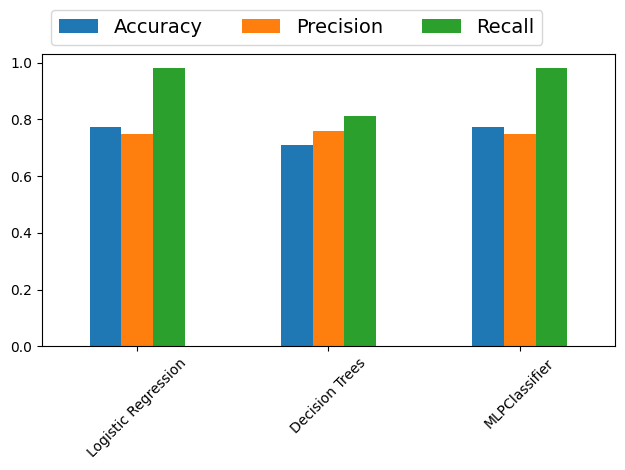

In [53]:
ax = loan_model.plot.bar(rot=45)
ax.legend(ncol=len(models.keys()),bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()
plt.show()